In [12]:
import setup_problem 
import ridge_regression

In [5]:
x_train, y_train, x_test, y_test, target_fn, coefs_true, featurize = sp.load_problem('lasso_data.pickle')

In [7]:
x_train_fea = featurize(x_train)

In [28]:
x_train

array([ 0.66656527,  0.21099131,  0.98576502,  0.83007921,  0.4173425 ,
        0.79914531,  0.75793622,  0.57063288,  0.57901931,  0.11847408,
        0.7728778 ,  0.01846007,  0.48549037,  0.90532834,  0.34524665,
        0.52598929,  0.87812873,  0.71102939,  0.91785725,  0.81949944,
        0.52841268,  0.18444641,  0.66066791,  0.34151433,  0.17131441,
        0.0145817 ,  0.67005126,  0.56746115,  0.30953677,  0.92460315,
        0.22157251,  0.18305074,  0.7936761 ,  0.7412013 ,  0.96562532,
        0.86924979,  0.47947701,  0.05568619,  0.01052375,  0.06852684,
        0.61011903,  0.43422072,  0.67360635,  0.66433739,  0.85583472,
        0.23127884,  0.16737973,  0.3100852 ,  0.71910866,  0.84699593,
        0.00771939,  0.74271395,  0.75167063,  0.94228665,  0.61627136,
        0.86785038,  0.96914286,  0.32087559,  0.10226573,  0.11437291,
        0.48689924,  0.88819266,  0.36110722,  0.549953  ,  0.24197779,
        0.13234472,  0.89236379,  0.57310452,  0.14130257,  0.16

In [31]:
x_train_fea[1]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [20]:
import matplotlib.pyplot as plt
import numpy as np

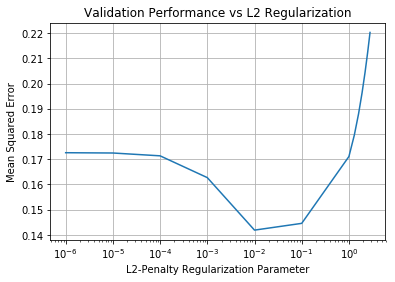

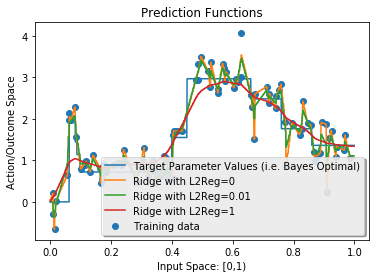

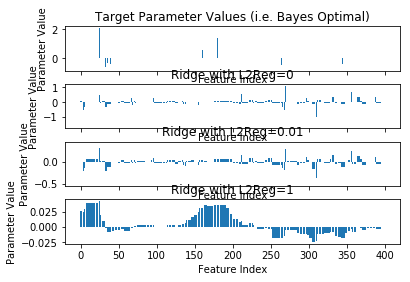

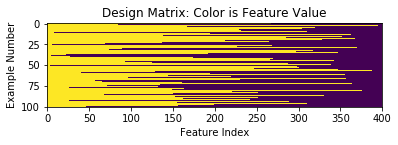

Hoping this is very close to 0:4.695119683413745e-11
    param_l2reg  mean_test_score  mean_train_score
0      0.000001         0.172579          0.006752
1      0.000010         0.172464          0.006752
2      0.000100         0.171345          0.006774
3      0.001000         0.162705          0.008285
4      0.010000         0.141887          0.032767
5      0.100000         0.144566          0.094953
6      1.000000         0.171068          0.197694
7      1.300000         0.179521          0.216591
8      1.600000         0.187993          0.233450
9      1.900000         0.196361          0.248803
10     2.200000         0.204553          0.262958
11     2.500000         0.212530          0.276116
12     2.800000         0.220271          0.288422


/Users/cyian/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [23]:
lasso_data_fname = "lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize = setup_problem.load_problem(lasso_data_fname)

    # Generate features
X_train = featurize(x_train)
X_val = featurize(x_val)
    #Visualize training data
fig, ax = plt.subplots()
ax.imshow(X_train)
ax.set_title("Design Matrix: Color is Feature Value")
ax.set_xlabel("Feature Index")
ax.set_ylabel("Example Number")
plt.show(block=False)

    # Compare our RidgeRegression to sklearn's.
ridge_regression.compare_our_ridge_with_sklearn(X_train, y_train, l2_reg = 1.5)

    # Do hyperparameter tuning with our ridge regression
grid, results = ridge_regression.do_grid_search_ridge(X_train, y_train, X_val, y_val)
print(results)

    # Plot validation performance vs regularization parameter
fig, ax = plt.subplots()
#    ax.loglog(results["param_l2reg"], results["mean_test_score"])
ax.semilogx(results["param_l2reg"], results["mean_test_score"])
ax.grid()
ax.set_title("Validation Performance vs L2 Regularization")
ax.set_xlabel("L2-Penalty Regularization Parameter")
ax.set_ylabel("Mean Squared Error")
fig.show()

    # Let's plot prediction functions and compare coefficients for several fits
    # and the target function.
pred_fns = []
x = np.sort(np.concatenate([np.arange(0,1,.001), x_train]))
name = "Target Parameter Values (i.e. Bayes Optimal)"
pred_fns.append({"name":name, "coefs":coefs_true, "preds": target_fn(x) })

l2regs = [0, grid.best_params_['l2reg'], 1]
X = featurize(x)
for l2reg in l2regs:
    ridge_regression_estimator = ridge_regression.RidgeRegression(l2reg=l2reg)
    ridge_regression_estimator.fit(X_train, y_train)
    name = "Ridge with L2Reg="+str(l2reg)
    pred_fns.append({"name":name,
                    "coefs":ridge_regression_estimator.w_,
                    "preds": ridge_regression_estimator.predict(X) })

f = ridge_regression.plot_prediction_functions(x, pred_fns, x_train, y_train, legend_loc="best")
#f.show()

f = ridge_regression.compare_parameter_vectors(pred_fns)
#f.show()

In [24]:
np.concatenate((10.**np.arange(-6,1,1),
                                           np.arange(1,3,.3)
                                             ))

array([  1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+00,   1.30000000e+00,
         1.60000000e+00,   1.90000000e+00,   2.20000000e+00,
         2.50000000e+00,   2.80000000e+00])